In [11]:
!apt install aptitude

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
aptitude is already the newest version (0.8.13-3ubuntu1).
0 upgraded, 0 newly installed, 0 to remove and 18 not upgraded.


In [12]:
!aptitude install git make curl xz-utils file -y
!aptitude install mecab libmecab-dev mecab-ipadic-utf8 -y

git is already installed at the requested version (1:2.34.1-1ubuntu1.10)
make is already installed at the requested version (4.3-4.1build1)
curl is already installed at the requested version (7.81.0-1ubuntu1.14)
xz-utils is already installed at the requested version (5.2.5-2ubuntu1)
file is already installed at the requested version (1:5.41-3ubuntu0.1)
git is already installed at the requested version (1:2.34.1-1ubuntu1.10)
make is already installed at the requested version (4.3-4.1build1)
curl is already installed at the requested version (7.81.0-1ubuntu1.14)
xz-utils is already installed at the requested version (5.2.5-2ubuntu1)
file is already installed at the requested version (1:5.41-3ubuntu0.1)
No packages will be installed, upgraded, or removed.
0 packages upgraded, 0 newly installed, 0 to remove and 18 not upgraded.
Need to get 0 B of archives. After unpacking 0 B will be used.
                            
mecab is already installed at the requested version (0.996-14build9)
lib

In [13]:
!pip install mecab-python3==0.7

In [14]:
import MeCab

m = MeCab.Tagger()
print(m.parse("すもももももももものうち"))

すもも	名詞,一般,*,*,*,*,すもも,スモモ,スモモ
も	助詞,係助詞,*,*,*,*,も,モ,モ
もも	名詞,一般,*,*,*,*,もも,モモ,モモ
も	助詞,係助詞,*,*,*,*,も,モ,モ
もも	名詞,一般,*,*,*,*,もも,モモ,モモ
の	助詞,連体化,*,*,*,*,の,ノ,ノ
うち	名詞,非自立,副詞可能,*,*,*,うち,ウチ,ウチ
EOS



In [15]:
from collections import defaultdict
import re
import io
import urllib.request
from zipfile import ZipFile

In [16]:
def load_from_url(url):
  data = urllib.request.urlopen(url).read()
  zipdata = ZipFile(io.BytesIO(data))
  filename = zipdata.namelist()[0]
  text = zipdata.read(filename).decode("shift-jis")
  text = re.sub(r'［.*?］','', text)
  text = re.sub(r' 《.*?》 ','', text)
  return text

In [17]:
URL = "https://www.aozora.gr.jp/cards/000119/files/624_ruby_5668.zip"
text = load_from_url(URL)
text.split()[0]

'山月記'

In [18]:
def show_top10(text):
  m = MeCab.Tagger()
  node = m.parseToNode(text)
  dic = defaultdict(int)
  while node:
    a = node.feature.split(",")
    # 特徴情報をカンマで分割
    key = node.surface
    #ノードの表層形を取得
    if a[0] == u"名詞" and a[1] == u"一般" and key != "":
      dic[key] += 1
    node = node.next
  for k,v in sorted(dic.items(), key = lambda x: -x[1])[0:10]:
  # lambda式で-x[1](すなわちkey)を降順に表示
    print(k + ":"+str(v))

In [19]:
URL =  "https://www.aozora.gr.jp/cards/000119/files/624_ruby_5668.zip"
text = load_from_url(URL)
show_top10(text)

自分:24
声:21
袁:19
徴:18
人間:18
虎:16
叢:15
詩:9
曾:7
姿:7


In [20]:
!apt-get -y install fonts-ipafont-gothic

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  fonts-ipafont-mincho
The following NEW packages will be installed:
  fonts-ipafont-gothic fonts-ipafont-mincho
0 upgraded, 2 newly installed, 0 to remove and 18 not upgraded.
Need to get 8,237 kB of archives.
After this operation, 28.7 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-ipafont-gothic all 00303-21ubuntu1 [3,513 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-ipafont-mincho all 00303-21ubuntu1 [4,724 kB]
Fetched 8,237 kB in 1s (8,808 kB/s)
Selecting previously unselected package fonts-ipafont-gothic.
(Reading database ... 121279 files and directories currently installed.)
Preparing to unpack .../fonts-ipafont-gothic_00303-21ubuntu1_all.deb ...
Unpacking fonts-ipafont-gothic (00303-21ubuntu1) ...
Selecting previously unselected package fonts-ipa

In [21]:
import IPython
from wordcloud import WordCloud

In [22]:
def get_words(text):
  w = ""
  m = MeCab.Tagger()
  node = m.parseToNode(text)
  while node:
    a = node.feature.split(",")
    if a[0] == u"名詞" and a[1] == u"一般":
      w += node.surface + " "
    node = node.next
  return w

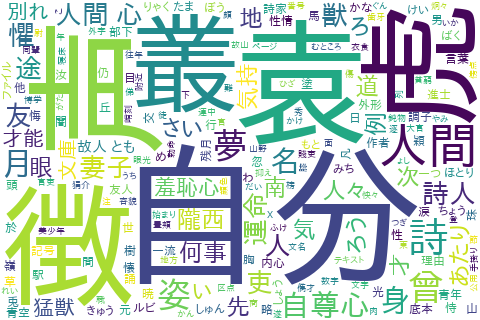

In [23]:
URL = "https://www.aozora.gr.jp/cards/000119/files/624_ruby_5668.zip"
text = load_from_url(URL)
words = get_words(text)
fpath = '/usr/share/fonts/opentype/ipafont-gothic/ipagp.ttf'
wc = WordCloud(background_color = "white", width = 480, height = 320, font_path = fpath)
wc.generate(words)
wc.to_file("wc.png")
IPython.display.Image("wc.png")

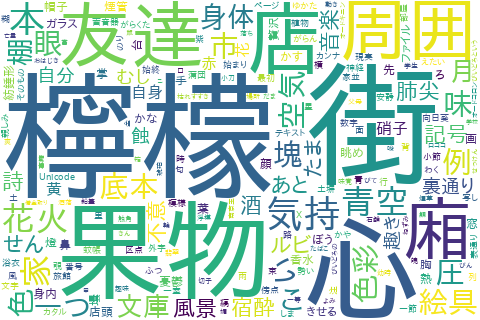

In [25]:
URL = "https://www.aozora.gr.jp/cards/000074/files/424_ruby_19825.zip"
text = load_from_url(URL)
words = get_words(text)
fpath = '/usr/share/fonts/opentype/ipafont-gothic/ipagp.ttf'
wc = WordCloud(background_color = "white", width = 480, height = 320, font_path = fpath)
wc.generate(words)
wc.to_file("wc.png")
IPython.display.Image("wc.png")